In [73]:
# load necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [25]:
# load data
df = pd.read_csv(r'c:\Users\Nandhakumar\Boston1.csv')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [27]:
# checking missing values
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [29]:
# summarizing stats of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
crim,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
zn,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
indus,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
chas,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
nox,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
rm,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
age,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
dis,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
rad,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
tax,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [30]:
# EDA
# Find the correlation between the features
df.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<Axes: >

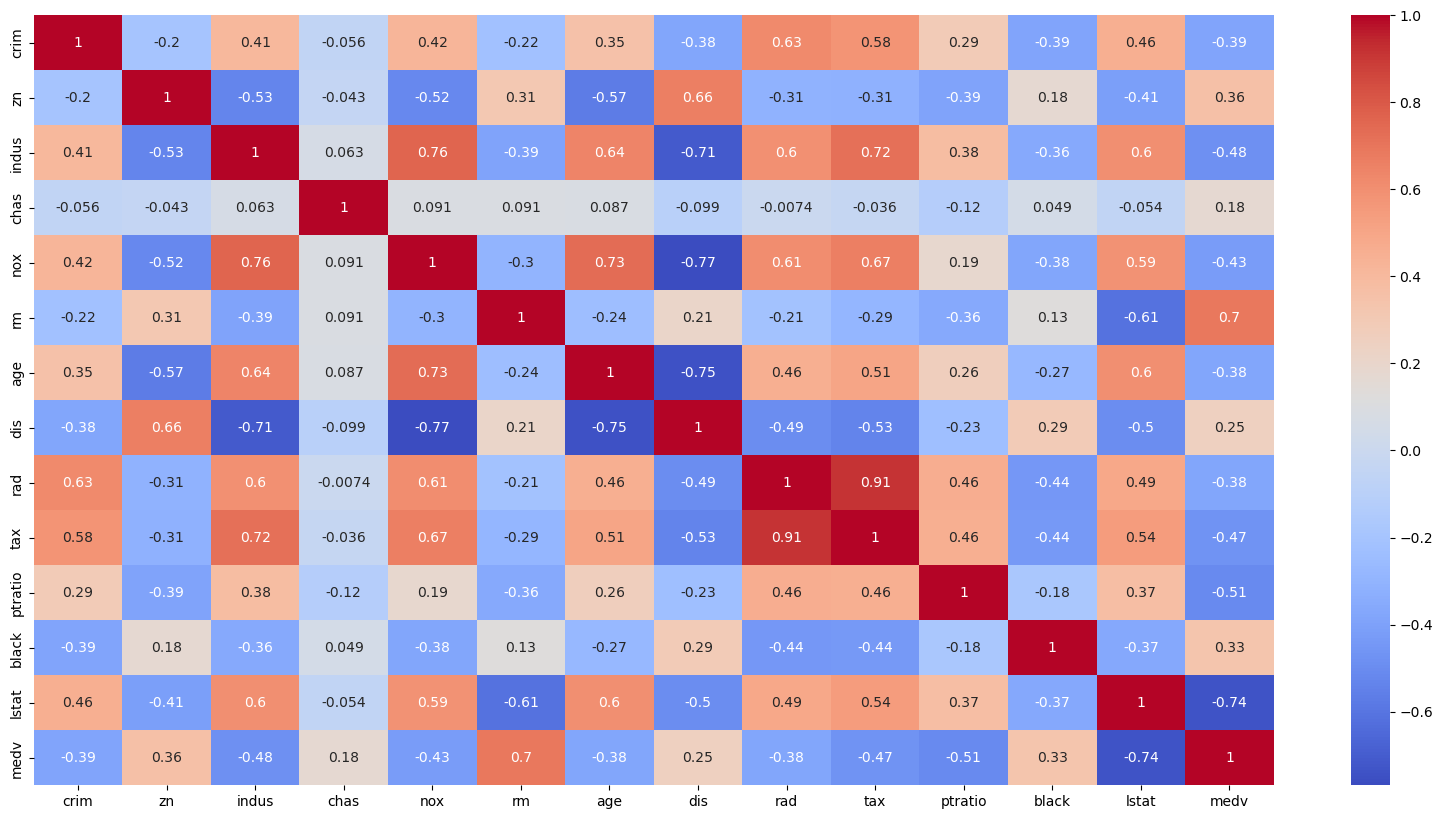

In [38]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [40]:
col_list =  df.columns
col_list

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

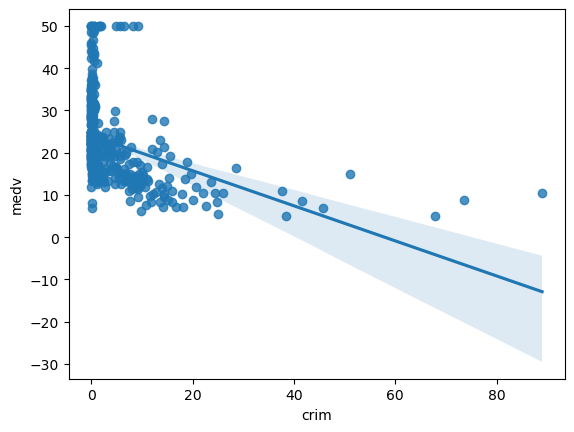

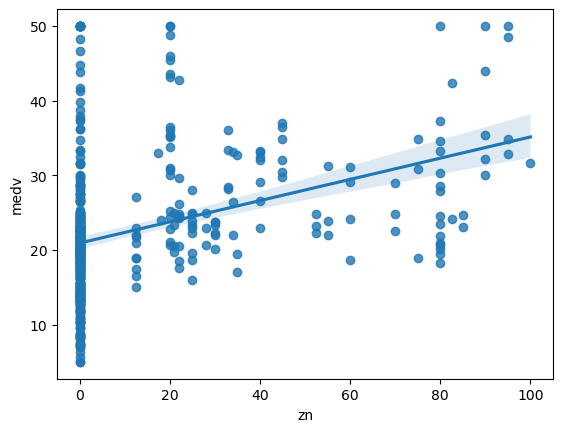

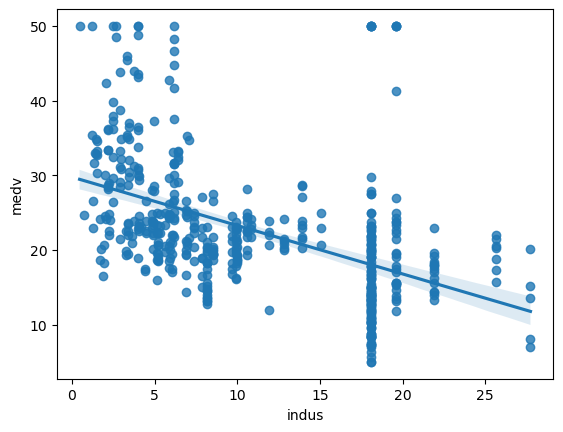

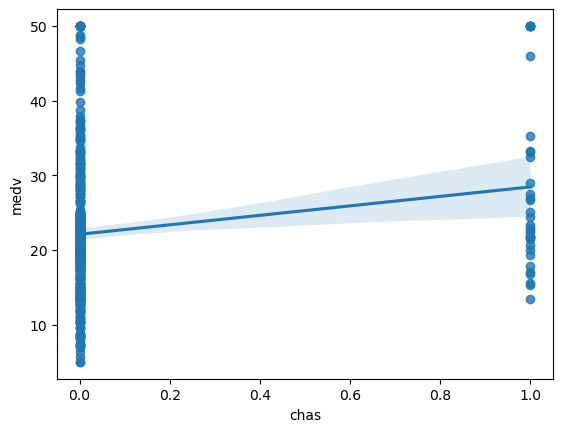

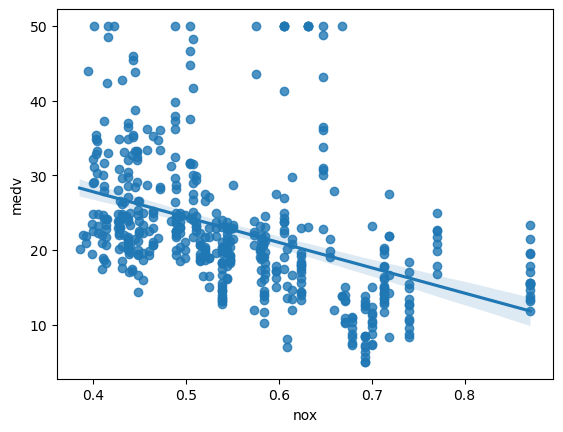

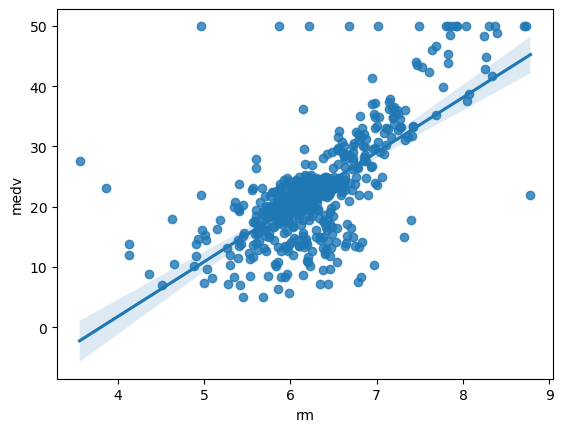

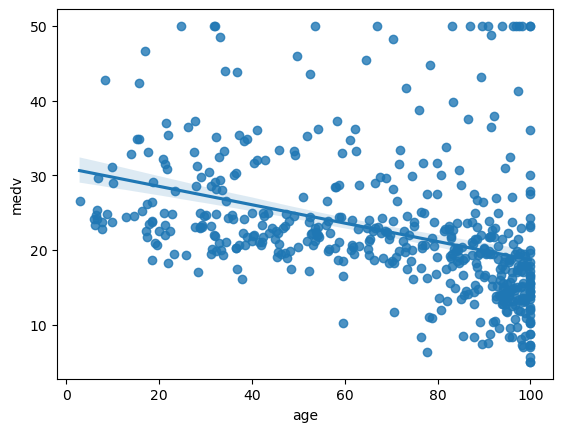

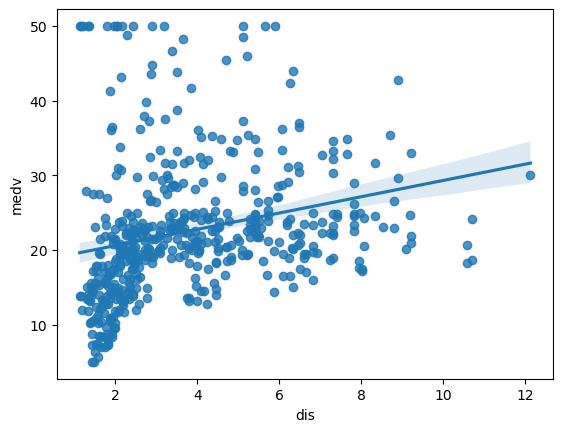

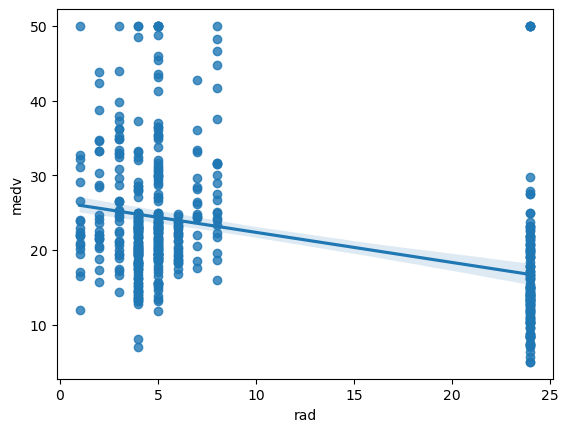

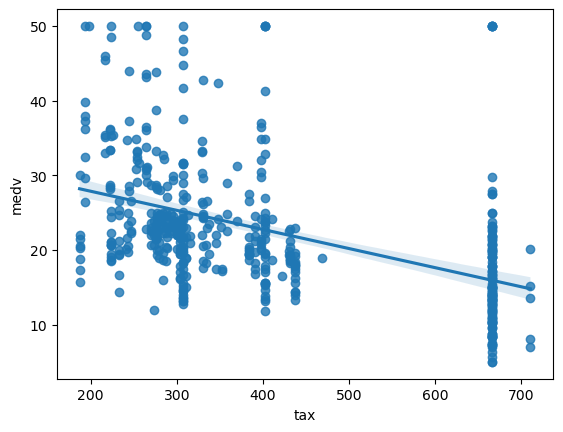

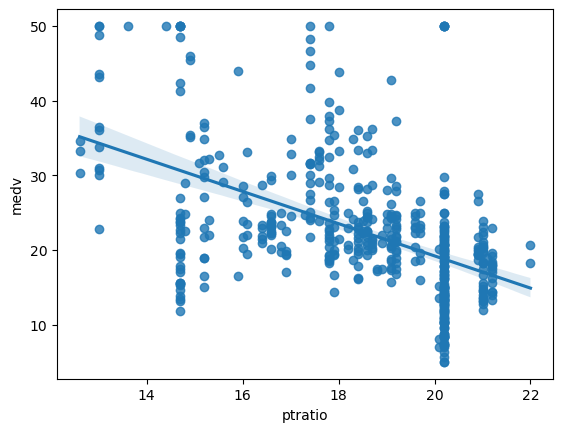

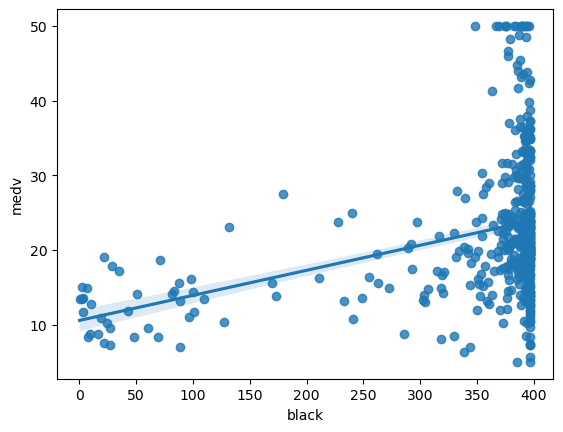

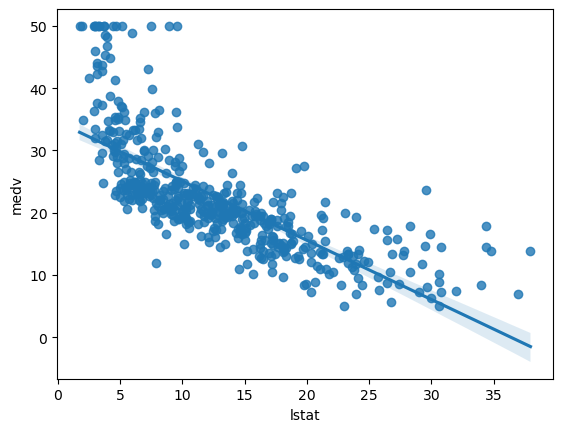

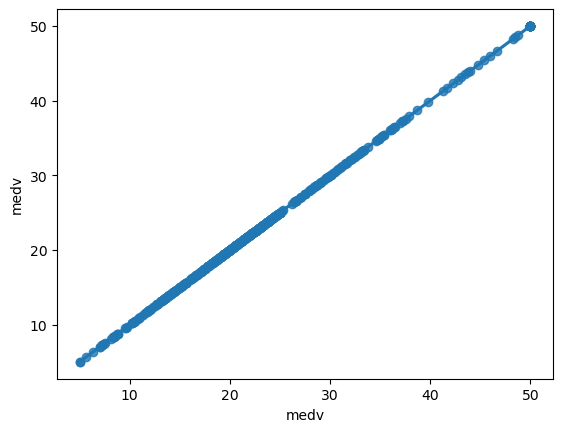

In [42]:
for col in col_list:
    sns.regplot(x=col, y='medv', data=df)
    plt.show()

In [78]:
x = df.loc[:,['crim', 'zn', 'indus', 'nox', 'rm', 'age', 'tax', 'ptratio', 'black', 'lstat', 'medv']]
y = df.medv

In [79]:
x

,crim,zn,indus,nox,rm,age,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0.538,6.575,65.2,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.573,6.593,69.1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.573,6.120,76.7,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.573,6.976,91.0,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.573,6.794,89.3,273,21.0,393.45,6.48,22.0


In [80]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64

In [81]:
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8, random_state=44)

In [82]:
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

In [83]:
X_train

array([[-0.42132314, -0.4935319 , -0.73526145, ...,  0.39174413,
        -0.35183715,  0.23021017],
       [ 1.21617846, -0.4935319 ,  1.01924941, ..., -1.31237483,
         1.53839228, -1.28286125],
       [-0.41585842, -0.4935319 , -0.06611933, ...,  0.36399411,
         0.46458698, -0.02015417],
       ...,
       [-0.43026198,  0.78499897, -0.88412028, ...,  0.40500619,
        -0.03772143, -0.2705185 ],
       [ 1.08779527, -0.4935319 ,  1.01924941, ..., -3.45291586,
         1.39309646, -1.544111  ],
       [-0.43044742,  1.21117592, -0.67022604, ...,  0.34515975,
        -0.91641519,  1.15546967]])

In [84]:
X_test

array([[-0.40275037, -0.4935319 , -0.1658403 , ...,  0.36131941,
         0.78285401, -0.52088284],
       [-0.42966934, -0.4935319 ,  0.41080701, ...,  0.43041585,
         0.72611946, -0.11812282],
       [ 0.03237785, -0.4935319 ,  1.01924941, ...,  0.33813866,
        -0.28956751, -0.15077904],
       ...,
       [-0.40909042, -0.4935319 , -0.1658403 , ...,  0.39129835,
        -0.6604178 , -0.10723741],
       [-0.43563851,  2.4897068 , -1.27288752, ...,  0.11101196,
        -1.06586232, -0.00926876],
       [-0.29792874, -0.4935319 ,  1.23314365, ..., -0.16715696,
        -0.07646698, -0.79301799]])

In [85]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [86]:
model.coef_

array([ 1.09170950e-15,  4.44089210e-16,  7.77156117e-16, -6.55031585e-15,
       -3.16413562e-15,  3.55271368e-15,  4.44089210e-15, -2.55351296e-15,
       -3.33066907e-15, -1.88737914e-15,  9.18661193e+00])

In [87]:
model.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [88]:
model.intercept_

22.58514851485148

In [89]:
print('MAE : ',mean_absolute_error(y_test, y_pred))
print('MSE : ', mean_squared_error(y_test, y_pred))
print('RMSE : ', np.sqrt(mean_squared_error(y_test, y_pred)))

MAE :  6.861613673761752e-15
MSE :  7.028595986910348e-29
RMSE :  8.383672218610618e-15


In [90]:
score = r2_score(y_test, y_pred)
adj_r = 1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print('R2 score: ', score)
print('Adjusted R2 score: ', adj_r)

R2 score:  1.0
Adjusted R2 score:  1.0


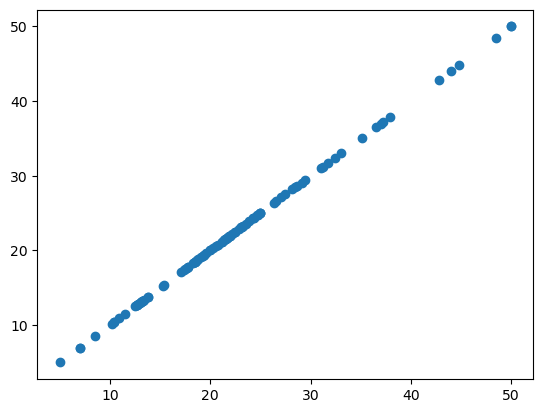

In [91]:
plt.scatter(y_test, y_pred)

In [92]:
residuals = y_test - y_pred

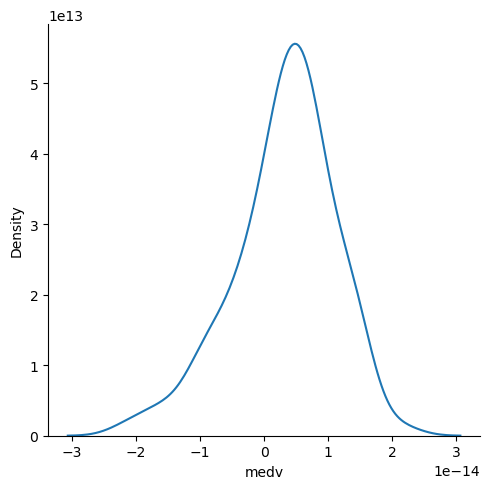

In [93]:
sns.displot(residuals, kind='kde')

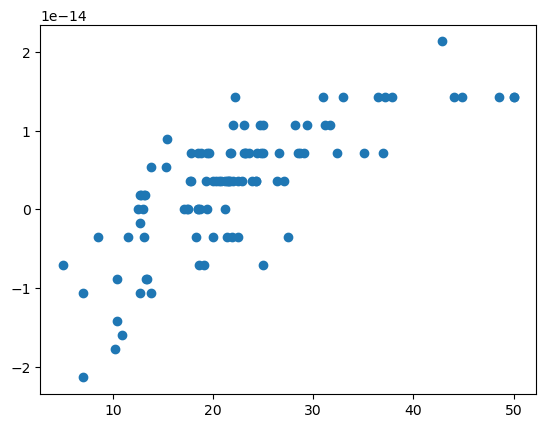

In [94]:
plt.scatter(y_pred, residuals)

In [115]:
model.predict(X_test[44].reshape(1,-1))

array([13.])

In [116]:
y_test.iloc[44]

13.0

In [118]:
# Pickling modele file for deployment
import pickle

In [119]:
pickle.dump(model,open('boston.pkl','wb'))

In [120]:
pickled_model = pickle.load(open('boston.pkl','rb'))

In [121]:
pickled_model.predict(X_test[44].reshape(1,-1))

array([13.])